# Load Dataset

In [1]:
import json
import pandas as pd

path = "/kaggle/input/dataaaa/code_features.jsonl"

records = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        records.append(json.loads(line))

df = pd.DataFrame(records)

df.head()


,code,complexity,representation,num_loops,num_for,num_while,max_loop_depth,has_nested_loops,loop_bound_type,has_log_update,...,has_continue,has_early_return,num_return,uses_comprehension,uses_generator,num_function_calls,uses_list,uses_dict,uses_set,uses_tuple
0,"from math import sqrt\na, v = map(int, input()...",constant,ast_static_complete,0,0,0,0,0,unknown,0,...,0,0,4,0,0,12,0,0,0,1
1,"from math import *\na, vm = map(int, input().s...",constant,ast_static_complete,0,0,0,0,0,unknown,0,...,0,0,0,0,0,11,0,0,0,1
2,"import os\nimport sys\nfrom io import BytesIO,...",constant,ast_static_complete,2,0,2,1,0,linear,0,...,0,0,15,1,0,55,0,0,0,1
3,"from math import *\na, vm = map(int, input().s...",constant,ast_static_complete,0,0,0,0,0,unknown,0,...,0,0,0,0,0,11,0,0,0,1
4,"from math import *\na, v = list(map(int, input...",constant,ast_static_complete,0,0,0,0,0,unknown,0,...,0,0,0,0,0,20,0,0,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   code                 4899 non-null   object
 1   complexity           4899 non-null   object
 2   representation       4899 non-null   object
 3   num_loops            4899 non-null   int64 
 4   num_for              4899 non-null   int64 
 5   num_while            4899 non-null   int64 
 6   max_loop_depth       4899 non-null   int64 
 7   has_nested_loops     4899 non-null   int64 
 8   loop_bound_type      4899 non-null   object
 9   has_log_update       4899 non-null   int64 
 10  uses_sort            4899 non-null   int64 
 11  recursion_flag       4899 non-null   int64 
 12  num_recursive_calls  4899 non-null   int64 
 13  has_break            4899 non-null   int64 
 14  has_continue         4899 non-null   int64 
 15  has_early_return     4899 non-null   int64 
 16  num_re

# Prepare Features & Labels

### Feature Importance Summary

**Highly Important**
- `num_loops` — Direct indicator of iteration count.
- `max_loop_depth` — Captures polynomial growth (e.g., nested loops).
- `has_nested_loops` — Distinguishes linear vs quadratic behavior.
- `has_log_update` — Identifies logarithmic patterns (e.g., halving).
- `uses_sort` — Sorting implies O(n log n).
- `recursion_flag` — Detects recursive algorithms.
- `num_recursive_calls` — Differentiates linear vs exponential recursion.
- `uses_comprehension` — Reveals hidden linear iteration.

**Moderately Important**
- `num_for`, `num_while` — Provide loop context.
- `has_break`, `has_continue` — Control-flow context only.
- `has_early_return` — Affects best-case, not worst-case.
- `uses_generator` — Often linear, sometimes lazy.
- `num_function_calls` — Helpful only with other features.

**Low / Not Important**
- `uses_list`, `uses_dict`, `uses_set`, `uses_tuple` — Common, not discriminative.
- `num_return` — Mostly stylistic.
- `representation` — Constant across samples.


In [3]:
DROP_COLUMNS = [
    "code",
    "representation",
    "uses_list",
    "uses_dict",
    "uses_set",
    "uses_tuple",
    "num_return",
    "num_function_calls"
]

df = df.drop(columns=DROP_COLUMNS)
df.head()

,complexity,num_loops,num_for,num_while,max_loop_depth,has_nested_loops,loop_bound_type,has_log_update,uses_sort,recursion_flag,num_recursive_calls,has_break,has_continue,has_early_return,uses_comprehension,uses_generator
0,constant,0,0,0,0,0,unknown,0,0,0,0,0,0,0,0,0
1,constant,0,0,0,0,0,unknown,0,0,0,0,0,0,0,0,0
2,constant,2,0,2,1,0,linear,0,0,0,0,1,0,0,1,0
3,constant,0,0,0,0,0,unknown,0,0,0,0,0,0,0,0,0
4,constant,0,0,0,0,0,unknown,0,0,0,0,0,0,0,0,0


### Encoding 

In [4]:
df = pd.get_dummies(
    df,
    columns=["loop_bound_type"],
    prefix="loop"
)

df.head()

,complexity,num_loops,num_for,num_while,max_loop_depth,has_nested_loops,has_log_update,uses_sort,recursion_flag,num_recursive_calls,has_break,has_continue,has_early_return,uses_comprehension,uses_generator,loop_linear,loop_log,loop_mixed,loop_unknown
0,constant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True
1,constant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True
2,constant,2,0,2,1,0,0,0,0,0,1,0,0,1,0,True,False,False,False
3,constant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True
4,constant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True


### Spliting

In [5]:
X = df.drop(columns=["complexity"])
y = df["complexity"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (4899, 18)
y shape: (4899,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


### check

In [7]:
# Ensure no object columns remain
assert X.select_dtypes(include="object").empty

# Ensure no missing values
assert X.isnull().sum().sum() == 0

# Verify numeric-only dataset
print(X.dtypes.value_counts())


int64    14
bool      4
Name: count, dtype: int64


# MODEL 1 — Gradient Boosted Trees (XGBoost)

In [8]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report

from xgboost import XGBClassifier

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

print(dict(zip(le.classes_, range(len(le.classes_)))))


{'constant': 0, 'cubic': 1, 'linear': 2, 'logn': 3, 'nlogn': 4, 'np': 5, 'quadratic': 6}


In [10]:
xgb_model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)


In [11]:
xgb_param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [3, 4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3],
    "min_child_weight": [1, 3, 5],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [1, 1.5, 2]
}


In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=40,
    scoring="f1_macro",
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train, y_train_enc)

best_xgb = xgb_search.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=600, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   3.8s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=400, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=400, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05

In [13]:
from sklearn.metrics import classification_report

y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb = le.inverse_transform(y_pred_xgb)

print("Best params:", xgb_search.best_params_)
print(classification_report(y_test, y_pred_xgb))


Best params: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
              precision    recall  f1-score   support

    constant       0.63      0.60      0.62       158
       cubic       0.67      0.67      0.67       121
      linear       0.47      0.58      0.52       171
        logn       0.63      0.62      0.63       134
       nlogn       0.69      0.67      0.68       159
          np       0.52      0.31      0.39       106
   quadratic       0.46      0.52      0.49       131

    accuracy                           0.58       980
   macro avg       0.58      0.57      0.57       980
weighted avg       0.58      0.58      0.58       980



<Figure size 800x600 with 0 Axes>

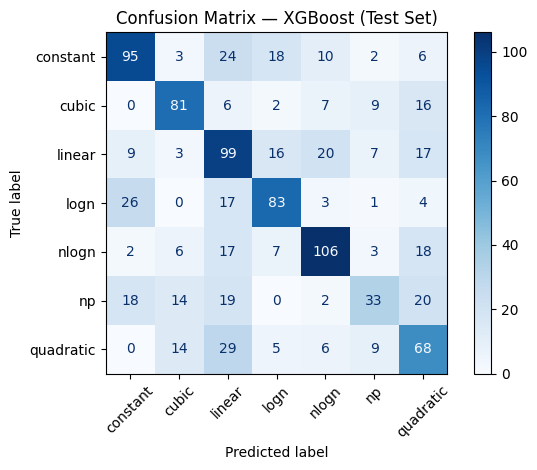

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=le.classes_)

disp_xgb = ConfusionMatrixDisplay(
    confusion_matrix=cm_xgb,
    display_labels=le.classes_
)

plt.figure(figsize=(8, 6))
disp_xgb.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix — XGBoost (Test Set)")
plt.grid(False)
plt.tight_layout()
plt.show()


# MODEL 2 — Small MLP (Neural Baseline)

In [15]:
le_mlp = LabelEncoder()
y_train_mlp = le_mlp.fit_transform(y_train)
y_test_mlp = le_mlp.transform(y_test)

print(dict(zip(le_mlp.classes_, range(len(le_mlp.classes_)))))


{'constant': 0, 'cubic': 1, 'linear': 2, 'logn': 3, 'nlogn': 4, 'np': 5, 'quadratic': 6}


In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report


In [17]:
mlp_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        max_iter=1000,
        early_stopping=True,
        n_iter_no_change=10,
        random_state=42
    ))
])

In [18]:
mlp_param_grid = {
    "mlp__hidden_layer_sizes": [(32,), (64,), (64, 32)],
    "mlp__activation": ["relu", "tanh"],
    "mlp__alpha": [1e-4, 1e-3, 1e-2],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01]
}


In [19]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

mlp_search = RandomizedSearchCV(
    estimator=mlp_pipeline,
    param_distributions=mlp_param_grid,
    n_iter=25,
    scoring="f1_macro",
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    error_score="raise"
)

mlp_search.fit(X_train, y_train_mlp)

best_mlp = mlp_search.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=600, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   3.5s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=400, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05,

In [20]:
y_pred_mlp = best_mlp.predict(X_test)
y_pred_mlp = le_mlp.inverse_transform(y_pred_mlp)

print("Best parameters:")
print(mlp_search.best_params_)

print(classification_report(y_test, y_pred_mlp))


Best parameters:
{'mlp__learning_rate_init': 0.01, 'mlp__hidden_layer_sizes': (64, 32), 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}
              precision    recall  f1-score   support

    constant       0.64      0.61      0.63       158
       cubic       0.71      0.64      0.68       121
      linear       0.44      0.63      0.52       171
        logn       0.61      0.63      0.62       134
       nlogn       0.68      0.57      0.62       159
          np       0.43      0.32      0.37       106
   quadratic       0.45      0.43      0.44       131

    accuracy                           0.56       980
   macro avg       0.57      0.55      0.55       980
weighted avg       0.57      0.56      0.56       980



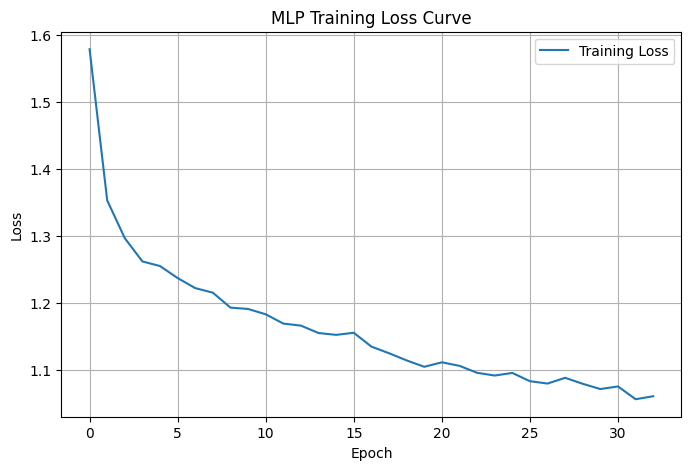

In [21]:
mlp_model = best_mlp.named_steps["mlp"]

plt.figure(figsize=(8, 5))
plt.plot(mlp_model.loss_curve_, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MLP Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

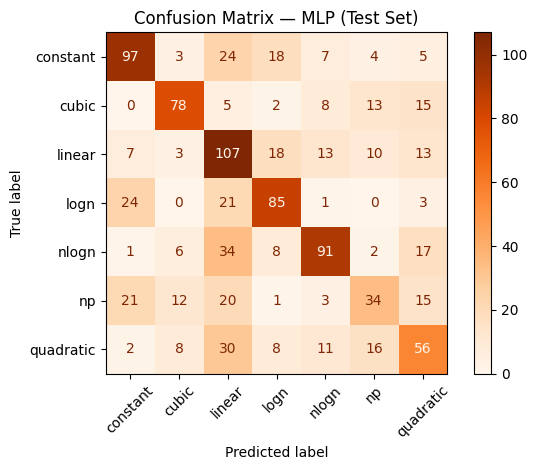

In [22]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp, labels=le_mlp.classes_)

disp_mlp = ConfusionMatrixDisplay(
    confusion_matrix=cm_mlp,
    display_labels=le_mlp.classes_
)

plt.figure(figsize=(8, 6))
disp_mlp.plot(cmap="Oranges", xticks_rotation=45)
plt.title("Confusion Matrix — MLP (Test Set)")
plt.grid(False)
plt.tight_layout()
plt.show()
